In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

In [3]:
datasus = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv",
                    encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",",engine='python')

In [4]:
datasus.tail()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,-,-,-,-,-,-,-,-,-,...,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81,28349257.38,1.195865e+10
23,50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,...,17844511.04,18653296.92,17769247.00,17357008.80,15652772.51,16703851.10,15838659.34,12508717.35,4059220.22,2.172158e+09
24,51 Mato Grosso,-,-,-,-,-,-,-,-,-,...,13827706.20,15445693.74,14431171.87,14444207.60,11943713.53,13981483.29,14585009.42,13083151.70,6174224.99,2.036924e+09
25,52 Goiás,-,-,-,-,-,-,-,-,-,...,34050298.55,36312121.02,34158023.81,34558308.52,27499307.93,31870107.62,34437633.20,33499284.38,20242641.73,4.657349e+09
26,53 Distrito Federal,-,-,-,-,-,-,-,-,-,...,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26,12044848.02,2.429933e+09


In [5]:
datasus.mean()

2007/Ago    3.049528e+05
2007/Set    7.881453e+05
2007/Out    2.440163e+06
2007/Nov    5.517354e+06
2007/Dez    1.233716e+07
                ...     
2020/Abr    4.000568e+07
2020/Mai    4.676903e+07
2020/Jun    4.536735e+07
2020/Jul    4.071708e+07
Total       5.993724e+09
Length: 157, dtype: float64

In [6]:
pd.options.display.float_format = "{:.2f}".format

In [7]:
datasus['Unidade da Federação'] = datasus['Unidade da Federação'].str.replace('\d+.','')

In [8]:
datasus = datasus.set_index('Unidade da Federação')

In [9]:
datasus_T = datasus.T

In [10]:
datasus_T = datasus_T[:-1]

In [11]:
datasus_T = datasus_T.iloc[138:]

In [12]:
datasus_T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 2009/Jan to 2020/Ago
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Rondônia             140 non-null    object
 1   Acre                 140 non-null    object
 2   Amazonas             140 non-null    object
 3   Roraima              140 non-null    object
 4   Pará                 140 non-null    object
 5   Amapá                140 non-null    object
 6   Tocantins            140 non-null    object
 7   Maranhão             140 non-null    object
 8   Piauí                140 non-null    object
 9   Ceará                140 non-null    object
 10  Rio Grande do Norte  140 non-null    object
 11  Paraíba              140 non-null    object
 12  Pernambuco           140 non-null    object
 13  Alagoas              140 non-null    object
 14  Sergipe              140 non-null    object
 15  Bahia                140 non-null    object
 16  M

In [13]:
datasus_T = datasus_T.apply(lambda x: x.replace('-','0'))

In [14]:
datasus_T = datasus_T.apply(pd.to_numeric)

In [15]:
datasus_mais_recente = datasus_T.iloc[-1]

In [16]:
datasus_mais_recente_pct = datasus_mais_recente / datasus_mais_recente.sum()

<AxesSubplot:xlabel='Unidade da Federação'>

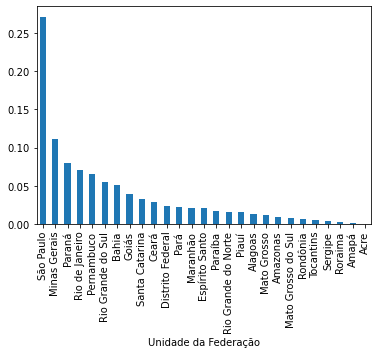

In [17]:
datasus_mais_recente_pct.sort_values(ascending=False).plot(kind='bar')

#### Get population data from IBGE - Wikipedia

In [18]:
def get_data_from_ibge_join_cols(df):
    """ This function gets the population from each state in Brazil from wikipedia 'Lista de unidades federativas do brasil'
    Transform the data and join it with the dataframe passed on."""
    
    col_name = df.name 
    
    ibge = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o')
    ibge = pd.DataFrame(ibge[0])
    ibge = ibge[['Unidade federativa','População']]
    
    #transformaçao nome Coluna e set do indice
    ibge = ibge.rename(columns={'População':'populacao','Unidade federativa':'uf'})
    ibge['uf'] = ibge['uf'].str.strip()
    ibge.set_index('uf', inplace = True)
    
    #Transformando coluna populacao em int64
    ibge['populacao'] = ibge['populacao'].apply(lambda x: x.replace(' ','')).apply(pd.to_numeric)
    
    
    
    final_df = ibge.join(df)
    
    #gerando o gasto por habitante
    final_df['gasto_por_habitante'] = final_df[col_name] / final_df['populacao']
    
    #tirando espaços em branco
    final_df.columns = final_df.columns.str.strip()
    
    return final_df
    
    
    

In [19]:
datasus_jul_2020 = get_data_from_ibge_join_cols(datasus_T.iloc[-2])

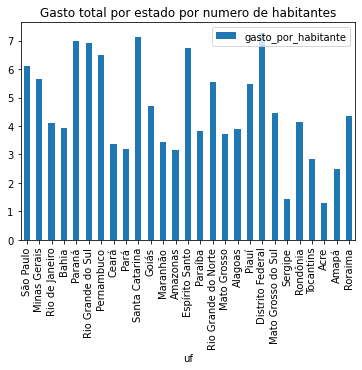

In [20]:
datasus_jul_2020.plot(kind='bar', y='gasto_por_habitante')
plt.title('Gasto total por estado por numero de habitantes')
plt.show()

Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.

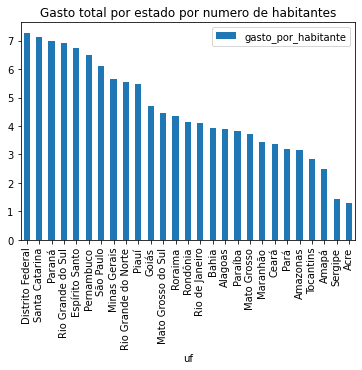

In [21]:
datasus_jul_2020.sort_values(by='gasto_por_habitante', ascending=False).plot(kind='bar', y='gasto_por_habitante')
plt.title('Gasto total por estado por numero de habitantes')
plt.show()

In [22]:
datasus_jul_2020.head()

,populacao,2020/Jul,gasto_por_habitante
uf,,,
São Paulo,46289333,282709570.31,6.11
Minas Gerais,21331292,120467187.34,5.65
Rio de Janeiro,17366189,71540227.33,4.12
Bahia,14930634,58898100.40,3.94
Paraná,11516840,80320852.69,6.97


In [23]:
datasus_jul_2020['populacao'] / 1000000

uf
São Paulo             46.29
Minas Gerais          21.33
Rio de Janeiro        17.37
Bahia                 14.93
Paraná                11.52
Rio Grande do Sul     11.42
Pernambuco             9.62
Ceará                  9.19
Pará                   8.69
Santa Catarina         7.28
Goiás                  7.14
Maranhão               7.13
Amazonas               4.23
Espírito Santo         4.06
Paraíba                4.04
Rio Grande do Norte    3.53
Mato Grosso            3.53
Alagoas                3.35
Piauí                  3.28
Distrito Federal       3.06
Mato Grosso do Sul     2.81
Sergipe                2.32
Rondônia               1.80
Tocantins              1.59
Acre                   0.89
Amapá                  0.86
Roraima                0.63
Name: populacao, dtype: float64

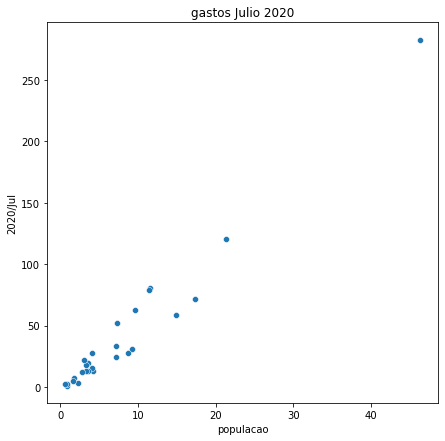

In [24]:
plt.figure(figsize=(7,7))
plt.title('gastos Julio 2020')
sns.scatterplot(data = datasus_jul_2020 / 1000000, x='populacao',y='2020/Jul')
plt.show()

Desafio 02 (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.

In [25]:
datasus_jun_2020 = get_data_from_ibge_join_cols(datasus_T.iloc[-3])

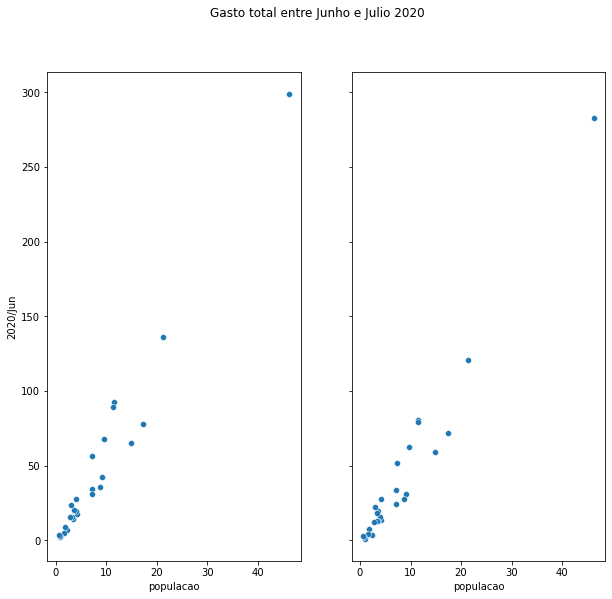

In [26]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,9),sharey=True)
fig.suptitle('Gasto total entre Junho e Julio 2020')
sns.scatterplot(ax=ax1, x='populacao',y='2020/Jun',data=datasus_jun_2020 / 1000000)
sns.scatterplot(ax=ax2, x='populacao',y='2020/Jul', data=datasus_jul_2020  / 1000000)
plt.show()

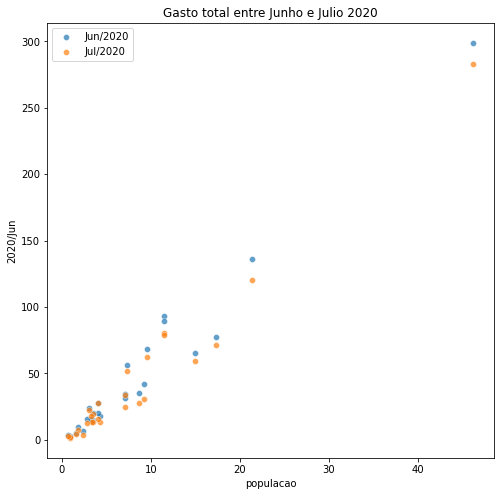

In [27]:
plt.figure(figsize=(8,8))
plt.title('Gasto total entre Junho e Julio 2020')
ax1  = sns.scatterplot(x='populacao',y='2020/Jun',data=datasus_jun_2020 / 1000000, label='Jun/2020',alpha=.7)
ax2 = sns.scatterplot(x='populacao',y='2020/Jul', data=datasus_jul_2020  / 1000000, label='Jul/2020',alpha=.7)
#ax1.xaxis.set_major_locator(tick.IndexLocator(base=0, offset=40))
#ax2.xaxis.set_major_locator(tick.IndexLocator(base=0, offset=40))
plt.show()

### Conclusão:
Pelos gráficos fica difícil tirar até o momento uma conclusão certa de tenência ou gasto por habitante, já que os dados são carregados com retroatividade. `Analise não conclusivo`

In [31]:
datasus_T

Unidade da Federação,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
2009/Jan,3147566.24,2152239.30,8607222.74,1186281.36,25397157.43,1702307.43,6022437.54,16509174.38,12411956.66,32123065.16,...,13448667.55,60870400.36,192321557.36,60381593.99,32082203.52,61522380.02,9771575.46,10039582.41,20817880.66,13150489.00
2009/Fev,3082108.12,2086775.61,8385962.92,1106225.18,23045700.70,1617603.91,5984209.71,15323800.01,10896197.27,28875478.53,...,11902752.05,40657841.56,178596376.79,57239101.63,29845655.79,52101637.77,9648706.17,9326576.40,20201261.16,12358825.51
2009/Mar,4190355.33,2476364.26,9207129.28,1422690.18,28225957.76,1863376.50,6640964.62,19000528.61,13754374.44,36018826.32,...,14490295.47,52749369.57,216951591.57,69070488.20,34921069.20,65111965.49,11784290.10,11680730.78,24174119.21,14445518.57
2009/Abr,4040251.62,2396887.63,8160517.20,1377859.19,27478025.61,1899215.36,6461045.18,17947811.13,12570578.13,35445605.90,...,14203837.61,48895602.42,215053018.45,64054678.26,33677499.55,61590828.91,11240770.37,11102643.47,22943952.73,14434211.04
2009/Mai,3946423.71,2610261.80,8562322.43,1363883.01,26610951.91,1929012.06,6622397.84,18274483.44,12936419.98,34894016.82,...,15160988.21,51167129.65,212890248.16,68685542.95,34053483.16,64402291.62,11155445.90,11495694.05,23781906.69,14622167.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020/Abr,7423678.64,2472063.08,16330913.81,2304961.42,28714969.96,1774558.12,6204453.42,23938156.77,11878587.16,43468816.62,...,23735724.64,68160773.35,251696362.66,96727112.19,51179993.45,76294596.96,15652772.51,11943713.53,27499307.93,18123899.78
2020/Mai,8581195.13,2383895.48,19441150.53,2910776.44,41248502.78,2701014.87,6732370.56,32979447.97,14175053.45,54200339.48,...,28614683.75,86281033.16,302857660.98,106103737.62,56843604.33,86076113.42,16703851.10,13981483.29,31870107.62,21437430.22
2020/Jun,9193593.76,2199920.70,17509334.66,3216466.51,35396030.78,2699492.23,5018138.13,31128144.66,15375523.59,42146555.81,...,27450865.16,77604925.21,299060851.62,92901461.36,56503747.99,89019478.82,15838659.34,14585009.42,34437633.20,23479773.03
2020/Jul,7407388.24,1163813.08,13358514.02,2739498.41,27618727.51,2155083.37,4489665.87,24374205.15,18019214.49,30809221.22,...,27460475.47,71540227.33,282709570.31,80320852.69,51764534.76,78929703.81,12508717.35,13083151.70,33499284.38,22233542.26


<AxesSubplot:ylabel='São Paulo'>

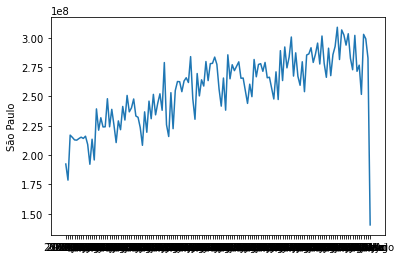

In [33]:
sns.lineplot(data=datasus_T, x=datasus_T.index, y='São Paulo')

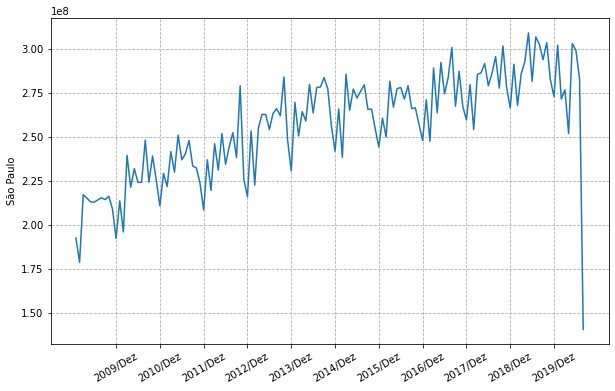

In [36]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=datasus_T, x=datasus_T.index, y='São Paulo')
plt.xticks(rotation=30)
#plt.ylim(0, 350)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
plt.grid(linestyle='--')
plt.show()